# Linear Regression with $CO_2$ Emissions of Cars 

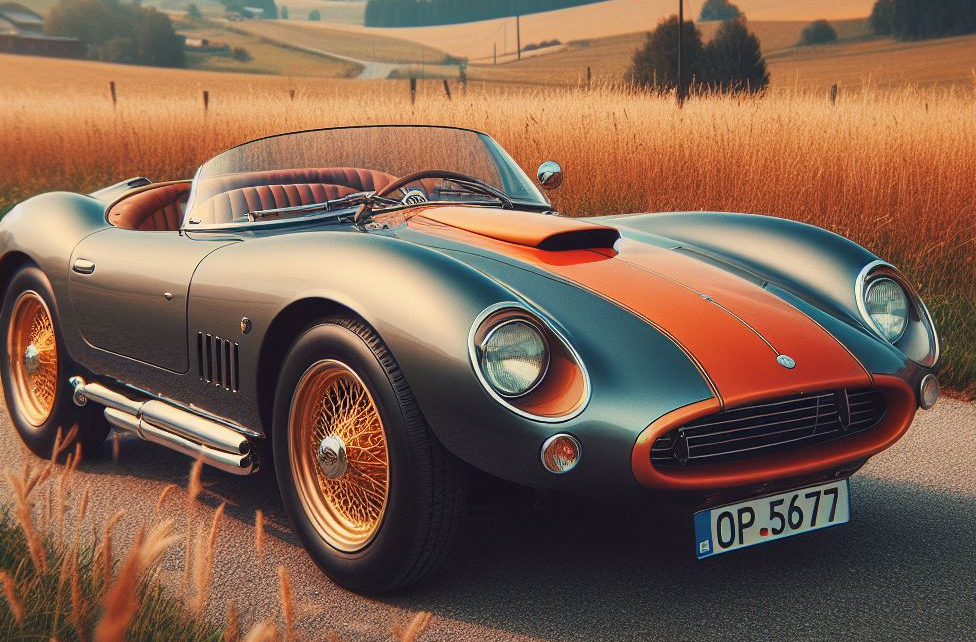

The dataset contains data related to $CO_2$ emissions and captures the relationship between various vehicle features and $CO_2$ emissions. 

**Column descriptions in the dataset**
1. Make: Vehicle brand.
2. Model: Vehicle model.
3. Vehicle Class: Vehicle class (e.g., compact, SUV).
4. Engine Size (L): Engine capacity (in liters).
5. Cylinders: Number of cylinders.
6. Transmission: Transmission type (e.g., automatic, manual).
7. Fuel Type: Type of fuel (e.g., gasoline, diesel).
8. Fuel Consumption City (L/100 km): City fuel consumption (per 100 kilometers in liters).
9. Fuel Consumption Hwy (L/100 km): Highway fuel consumption (per 100 kilometers in liters).
10. Fuel Consumption Comb (L/100 km): Combined fuel consumption (city and highway in liters per 100 kilometers).
11. Fuel Consumption Comb (mpg): Combined fuel consumption (miles per gallon).
12. $CO_2$ Emissions (g/km): $CO_2$ emissions (grams per kilometer).

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from yellowbrick.regressor import PredictionError


In [26]:
df1=pd.read_csv("co2.csv")
df1

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.000,4,AS5,Z,9.900,6.700,8.500,33,196
1,ACURA,ILX,COMPACT,2.400,4,M6,Z,11.200,7.700,9.600,29,221
2,ACURA,ILX HYBRID,COMPACT,1.500,4,AV7,Z,6.000,5.800,5.900,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.500,6,AS6,Z,12.700,9.100,11.100,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.500,6,AS6,Z,12.100,8.700,10.600,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.000,4,AS8,Z,10.700,7.700,9.400,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.000,4,AS8,Z,11.200,8.300,9.900,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.000,4,AS8,Z,11.700,8.600,10.300,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.000,4,AS8,Z,11.200,8.300,9.900,29,232


In [27]:
df = df1.copy()

## Exploratory Data Analyses

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [29]:
# Rename columns
df.rename(columns={ 'Make': 'make',
                    'Model': 'model',
                    'Vehicle Class': 'vehicle_class',
                    'Engine Size(L)': 'engine_size',
                    'Cylinders': 'cylinders',
                    'Transmission': 'transmission',
                    'Fuel Type': 'fuel_type',
                    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
                    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
                    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
                    'Fuel Consumption Comb (mpg)': 'fuel_cons_comb_mpg',
                    'CO2 Emissions(g/km)': 'co2'
                    }, inplace=True)
for i in df.columns:
    print(i)

make
model
vehicle_class
engine_size
cylinders
transmission
fuel_type
fuel_cons_city
fuel_cons_hwy
fuel_cons_comb
fuel_cons_comb_mpg
co2


In [30]:
df.isnull().sum()

make                  0
model                 0
vehicle_class         0
engine_size           0
cylinders             0
transmission          0
fuel_type             0
fuel_cons_city        0
fuel_cons_hwy         0
fuel_cons_comb        0
fuel_cons_comb_mpg    0
co2                   0
dtype: int64

In [31]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df)

,Total,Percent
make,0,0.000
model,0,0.000
vehicle_class,0,0.000
engine_size,0,0.000
cylinders,0,0.000
transmission,0,0.000
fuel_type,0,0.000
fuel_cons_city,0,0.000
fuel_cons_hwy,0,0.000
fuel_cons_comb,0,0.000


In [32]:
df.shape

(7385, 12)

In [33]:
df.dtypes

make                   object
model                  object
vehicle_class          object
engine_size           float64
cylinders               int64
transmission           object
fuel_type              object
fuel_cons_city        float64
fuel_cons_hwy         float64
fuel_cons_comb        float64
fuel_cons_comb_mpg      int64
co2                     int64
dtype: object

In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.000,3.160,1.354,0.900,2.000,3.000,3.700,8.400
cylinders,7385.000,5.615,1.828,3.000,4.000,6.000,6.000,16.000
fuel_cons_city,7385.000,12.557,3.500,4.200,10.100,12.100,14.600,30.600
fuel_cons_hwy,7385.000,9.042,2.224,4.000,7.500,8.700,10.200,20.600
fuel_cons_comb,7385.000,10.975,2.893,4.100,8.900,10.600,12.600,26.100
fuel_cons_comb_mpg,7385.000,27.482,7.232,11.000,22.000,27.000,32.000,69.000
co2,7385.000,250.585,58.513,96.000,208.000,246.000,288.000,522.000


In [35]:
df[df.duplicated() == True]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
1075,ACURA,RDX AWD,SUV - SMALL,3.500,6,AS6,Z,12.100,8.700,10.600,27,244
1076,ACURA,RLX,MID-SIZE,3.500,6,AS6,Z,11.900,7.700,10.000,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.800,4,AM6,Z,9.700,6.900,8.400,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.900,12,A6,Z,18.000,12.600,15.600,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.700,8,AM7,Z,17.400,11.300,14.700,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.700,8,AS6,X,17.700,13.600,15.900,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.000,4,M6,X,9.800,7.300,8.700,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.400,4,AS8,X,7.800,5.900,7.000,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.400,4,M6,X,7.900,5.900,7.000,40,163


In [36]:
df[df.duplicated() == True].count()

make                  1103
model                 1103
vehicle_class         1103
engine_size           1103
cylinders             1103
transmission          1103
fuel_type             1103
fuel_cons_city        1103
fuel_cons_hwy         1103
fuel_cons_comb        1103
fuel_cons_comb_mpg    1103
co2                   1103
dtype: int64

In [45]:
df.make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [46]:
df["make"].value_counts()  

FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: make, dtype: int64

In [40]:
df.dtypes

make                   object
model                  object
vehicle_class          object
engine_size           float64
cylinders               int64
transmission           object
fuel_type              object
fuel_cons_city        float64
fuel_cons_hwy         float64
fuel_cons_comb        float64
fuel_cons_comb_mpg      int64
co2                     int64
dtype: object

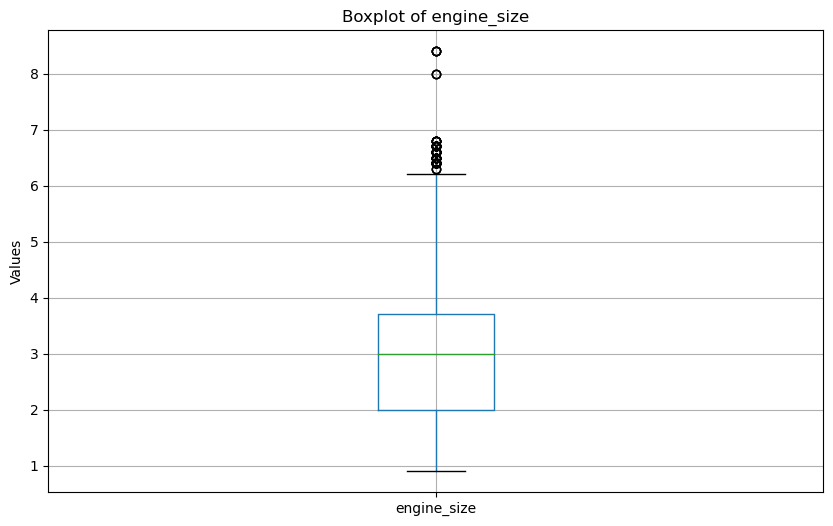

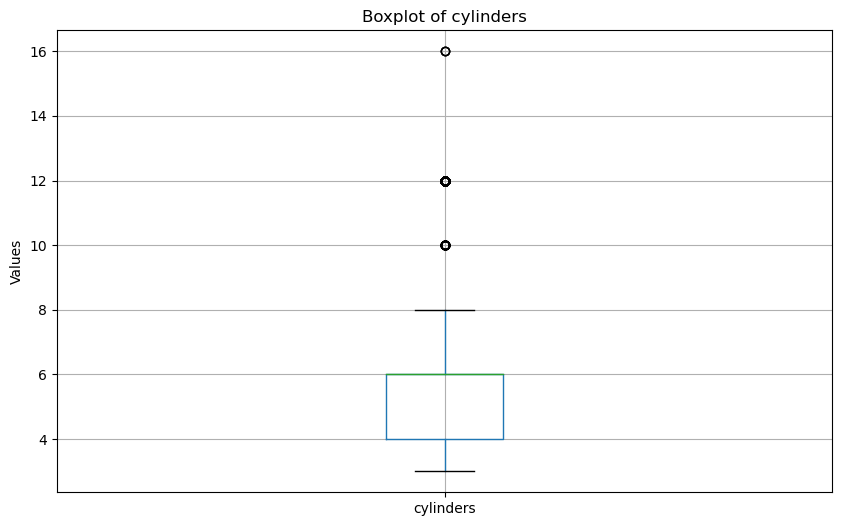

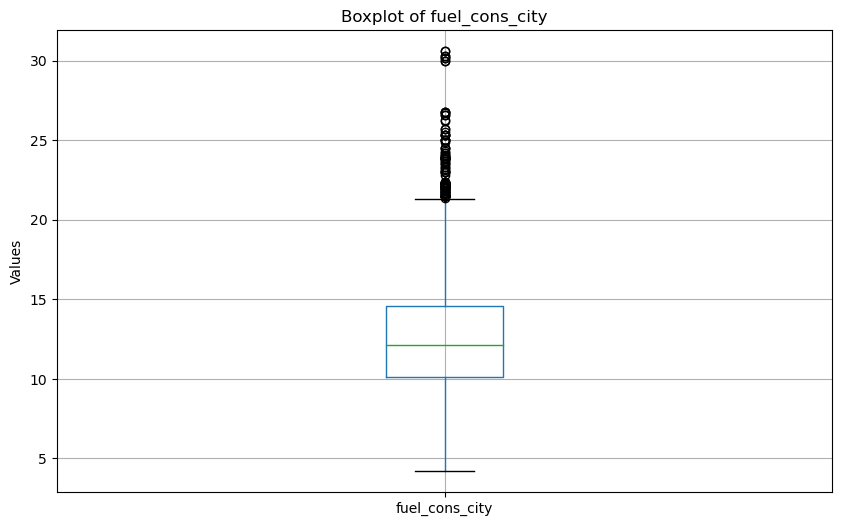

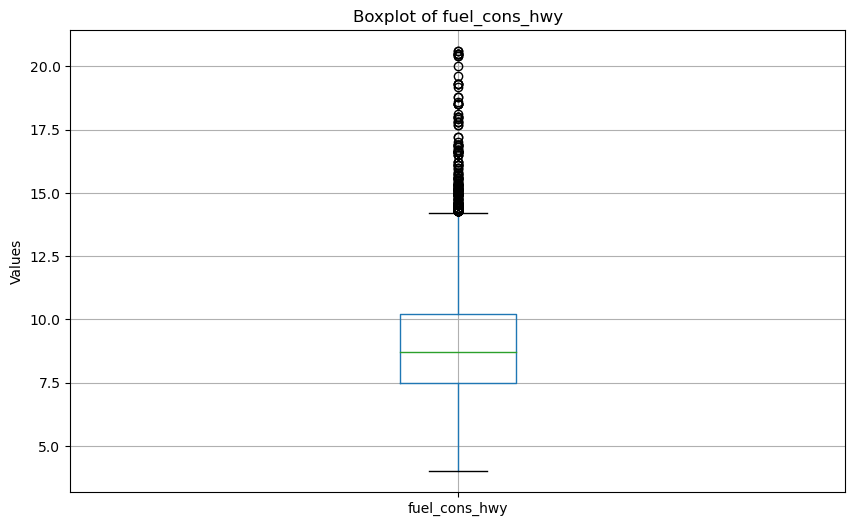

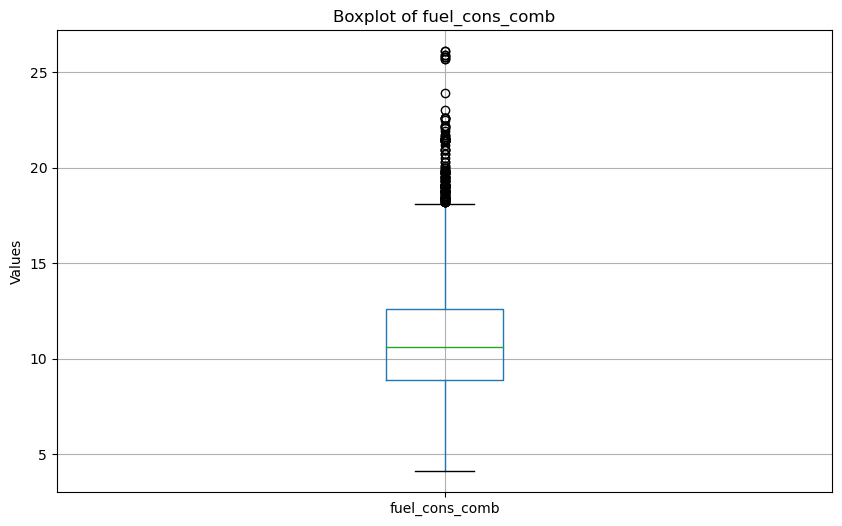

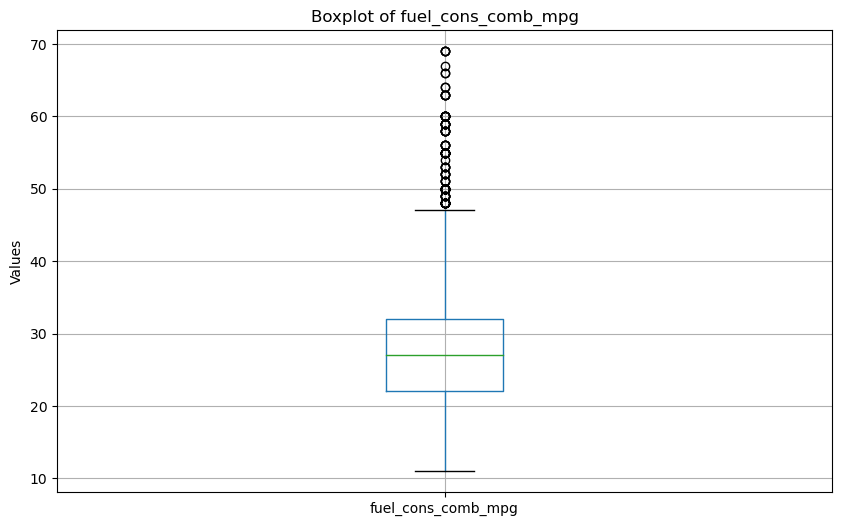

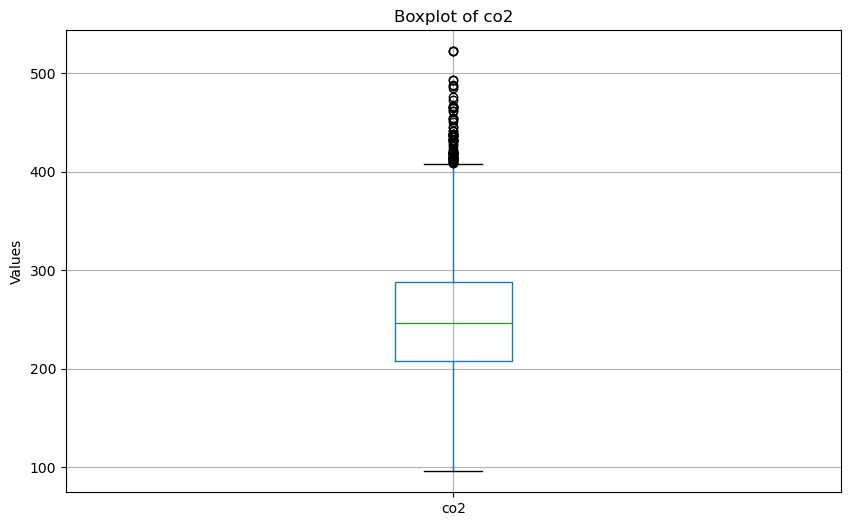

In [41]:
# Select numerical columns for boxplot visualization
numerical_columns = ['engine_size', 'cylinders', 'fuel_cons_city', 'fuel_cons_hwy', 
                     'fuel_cons_comb','fuel_cons_comb_mpg','co2']

# Create boxplots for each numerical column 
for column in numerical_columns:
    df.boxplot(column)
    plt.title(f"Boxplot of {column}")
    plt.ylabel("Values")
    plt.show()


In [42]:
df.corr()

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
engine_size,1.000,0.928,0.831,0.762,0.817,-0.758,0.851
cylinders,0.928,1.000,0.801,0.715,0.781,-0.719,0.833
fuel_cons_city,0.831,0.801,1.000,0.948,0.994,-0.927,0.920
fuel_cons_hwy,0.762,0.715,0.948,1.000,0.977,-0.891,0.884
fuel_cons_comb,0.817,0.781,0.994,0.977,1.000,-0.926,0.918
fuel_cons_comb_mpg,-0.758,-0.719,-0.927,-0.891,-0.926,1.000,-0.907
co2,0.851,0.833,0.920,0.884,0.918,-0.907,1.000


In [61]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.8 and val < 0.99999 or val <= -0.8 and val > -0.99999:
        color = 'red'
    elif val < 0.8 and val >= 0.5 or val > -0.8 and val <= -0.5:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

In [62]:
# Colorful correlations table
df.select_dtypes(include=[np.number]).corr().style.applymap(color_correlation1)

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
fuel_cons_comb_mpg,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


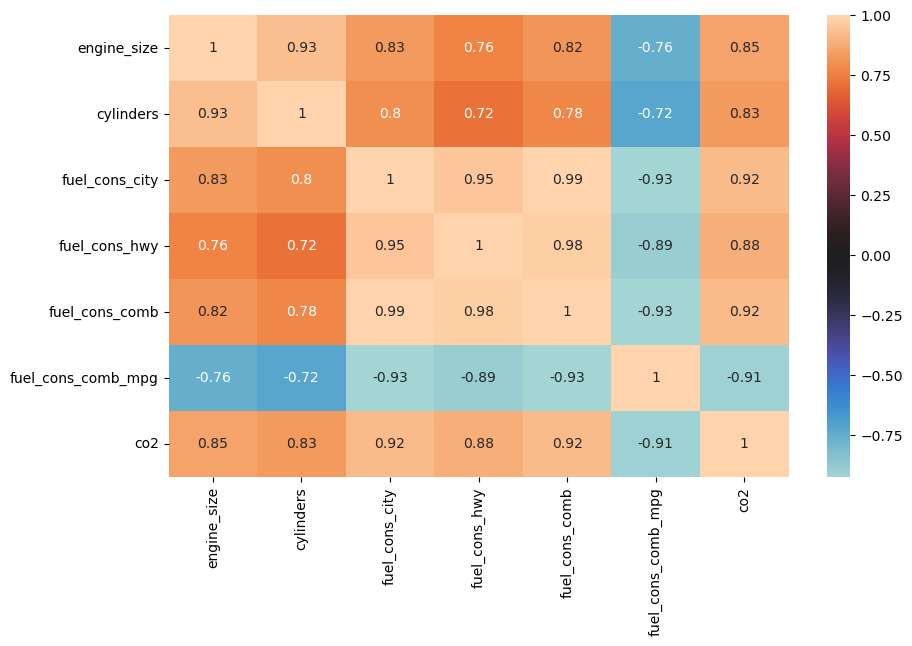

In [43]:
sns.heatmap(df.corr(), annot=True, center=0);

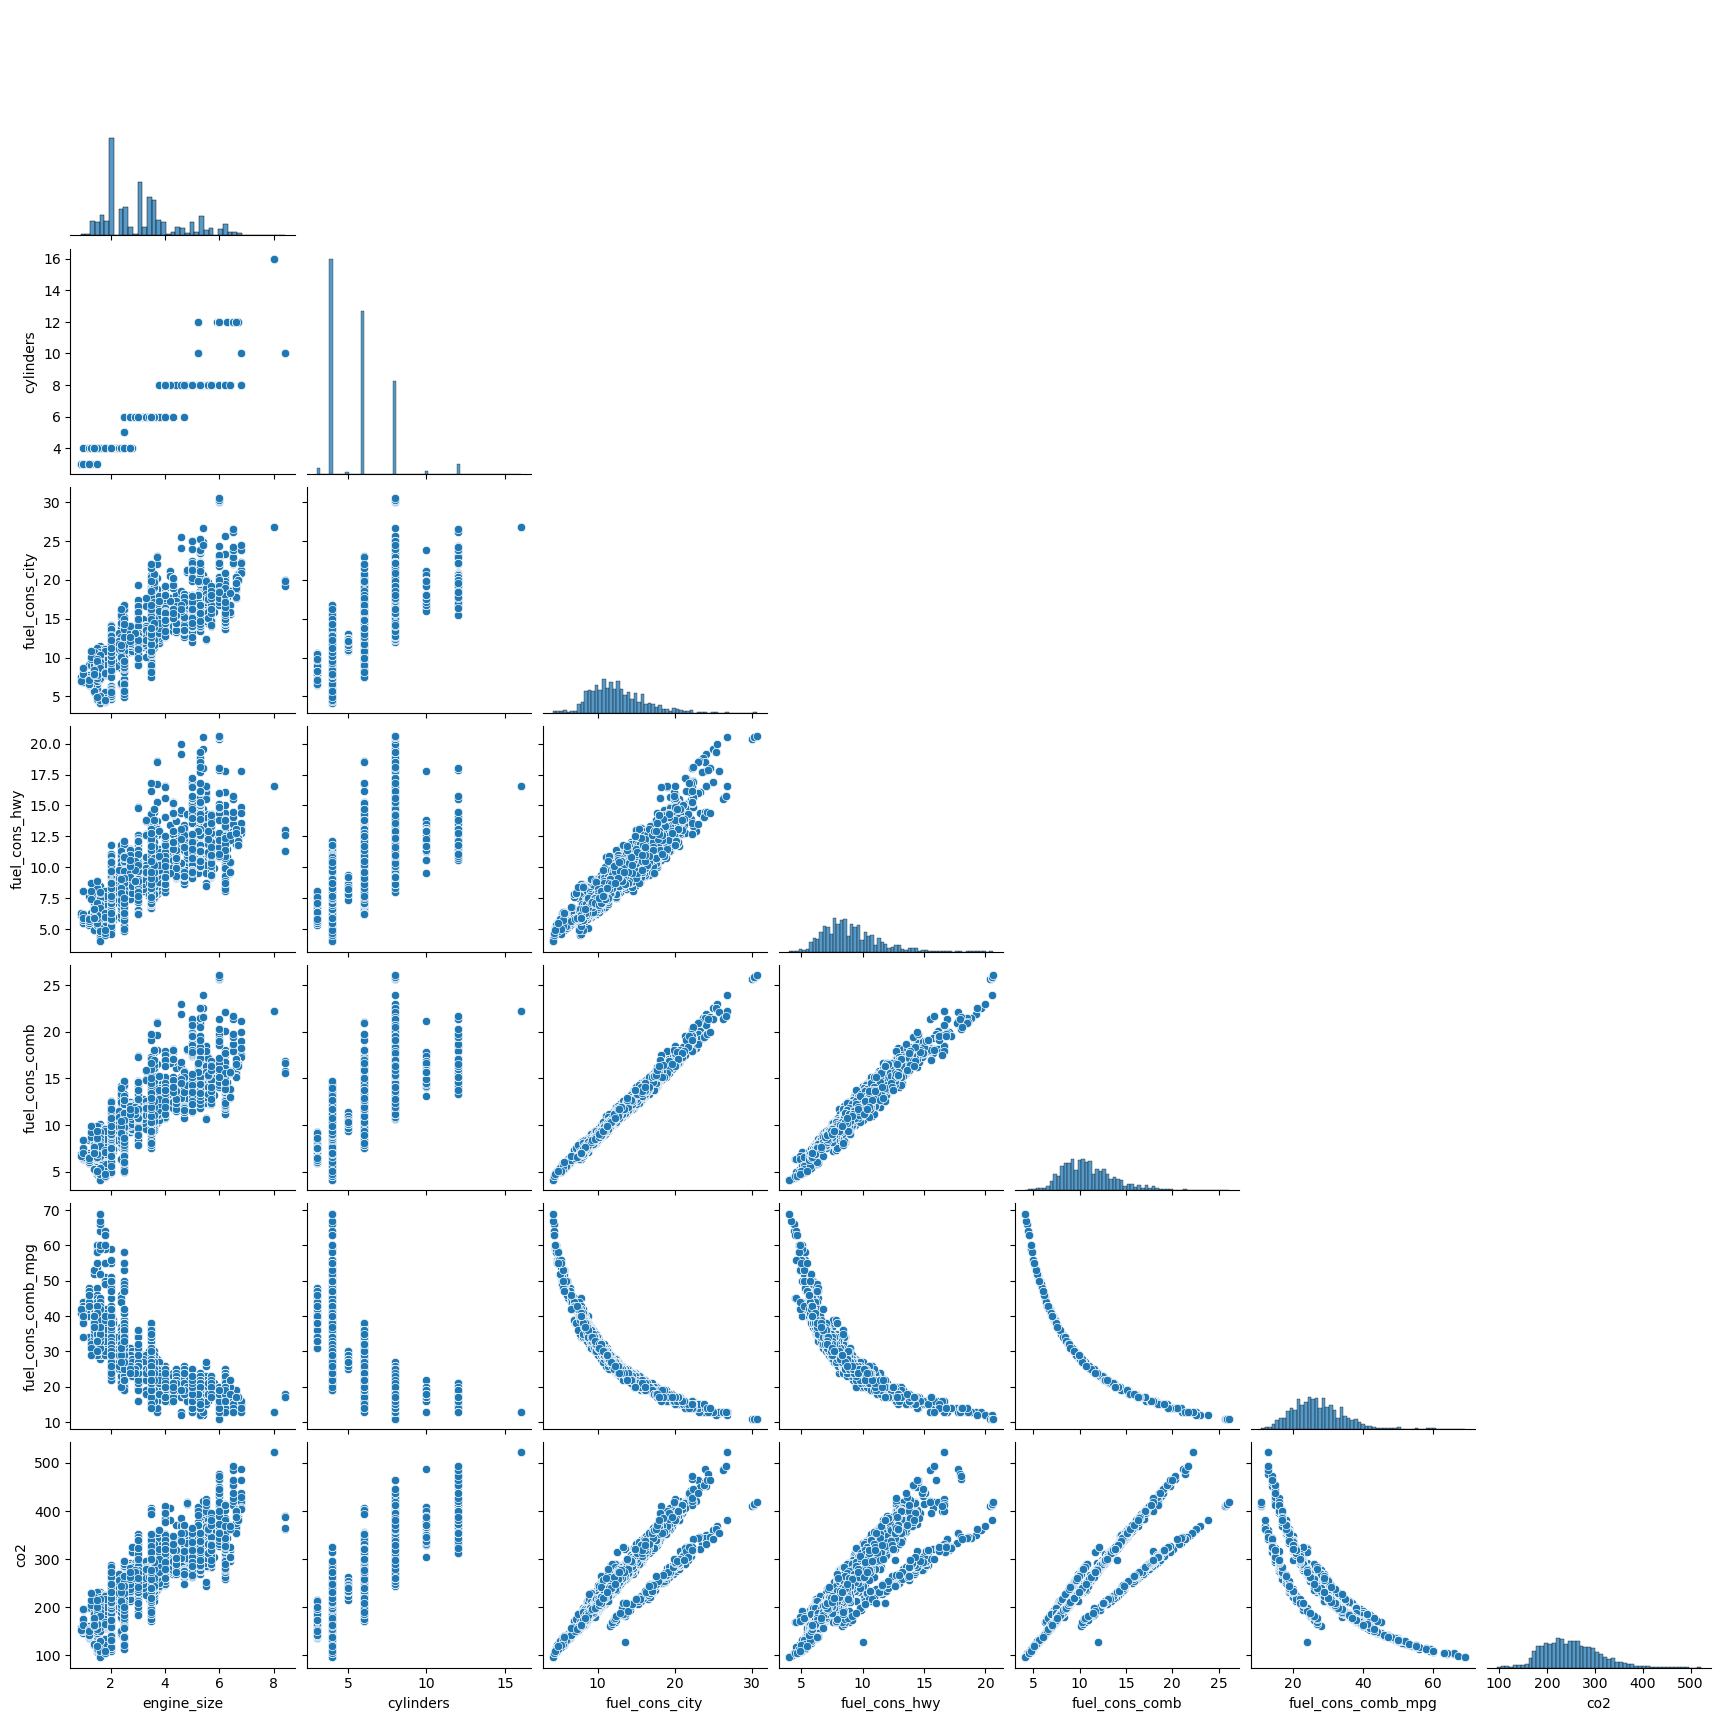

In [44]:
sns.pairplot(data=df, corner=True);

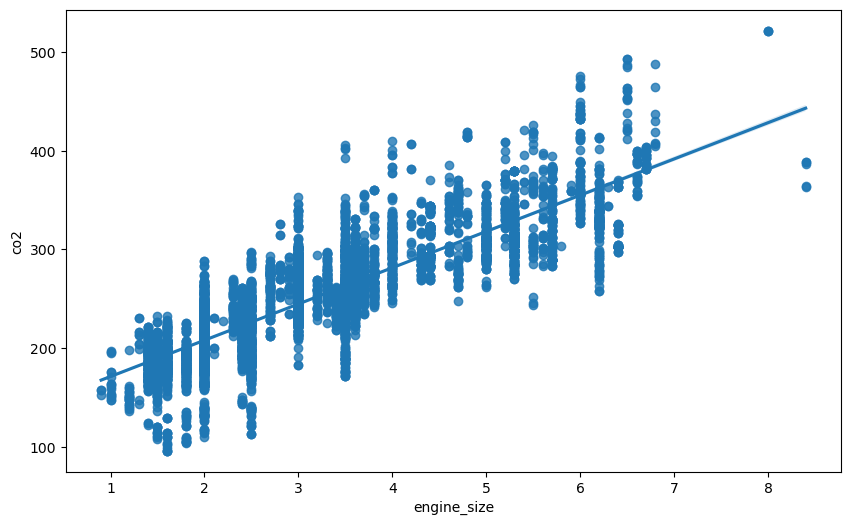

In [48]:
sns.regplot(x="engine_size", y ="co2", data=df);

## Simple Linear Regression

In [244]:
y = df["co2"]
X = df[["engine_size"]]

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
model.coef_

array([36.61217814])

In [111]:
model.intercept_

135.05657623459751

In [112]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

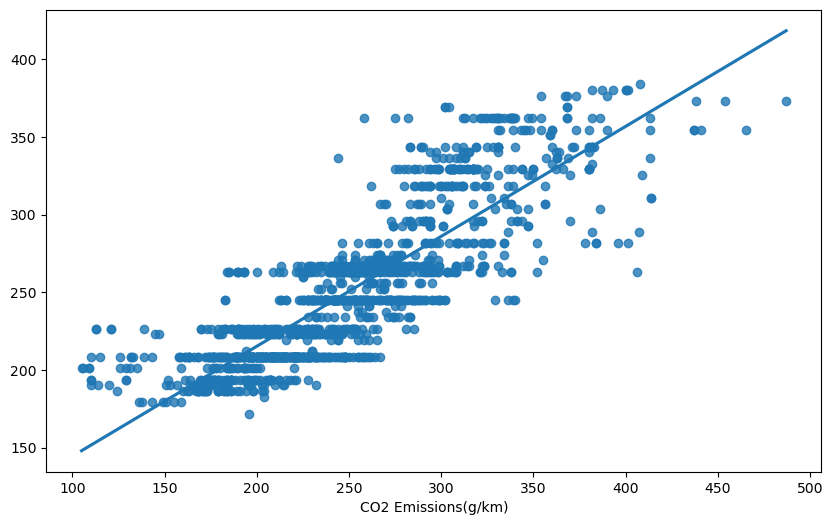

In [113]:
sns.regplot(x=y_test, y=y_pred, ci=None);

## Model evaluation

In [114]:
def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [115]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, "simple_lr")
slr_score 

,simple_lr_train,simple_lr_test
R2,0.725,0.724
mae,23.375,22.927
mse,941.716,949.985
rmse,30.687,30.822


In [116]:
avg_co2= df['co2'].mean()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse/avg_co2

0.12299965221215856

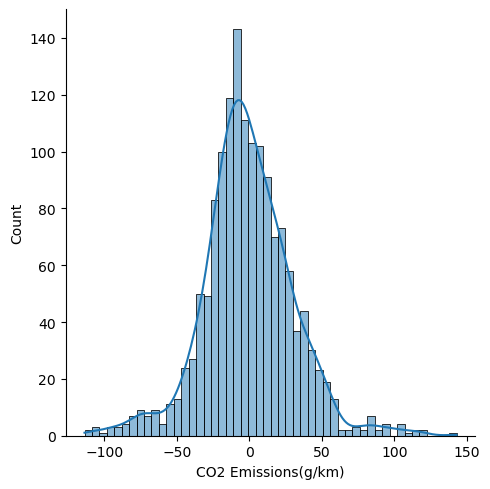

In [117]:
sns.displot((y_test-y_pred), bins=50, kde=True);

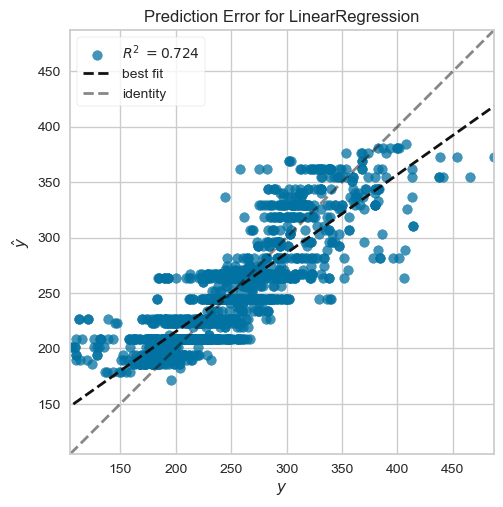

In [118]:
from yellowbrick.regressor import PredictionError
# to check error distribution

model = LinearRegression() 
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)   
visualizer.score(X_test, y_test)   
visualizer.show(); 

# Multiple Linear Regression

In [246]:
X = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']] 
y = df['co2']

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

LinearRegression()

In [124]:
multi_model.coef_

array([12.78705771,  3.70508653,  0.86566237,  8.51126305])

In [126]:
y_train_pred = multi_model.predict(X_train)
y_pred = multi_model.predict(X_test)

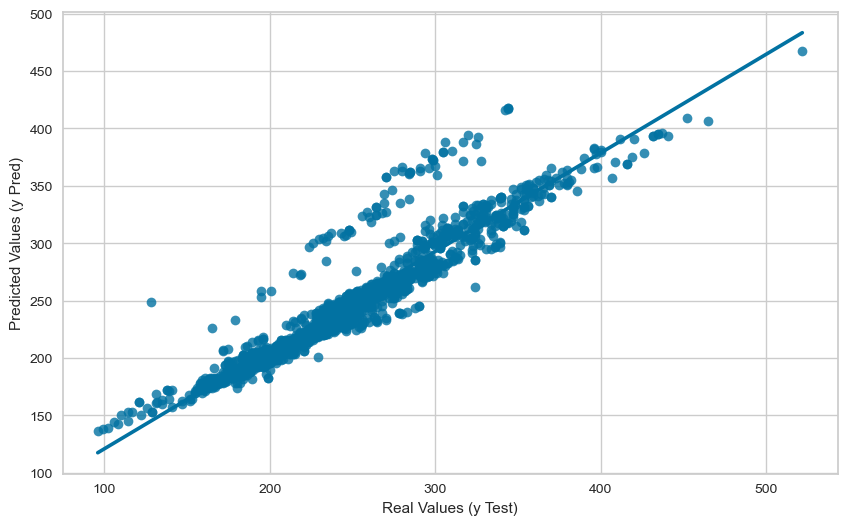

In [129]:
data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

sns.regplot(data=data, x='y_test', y='y_pred', ci=None)
plt.xlabel('Real Values (y Test)')
plt.ylabel('Predicted Values (y Pred)')
plt.show()

In [130]:
mlr_score = train_val(y_train, y_train_pred, y_test, y_pred, "multiple_lr")
mlr_score 

,multiple_lr_train,multiple_lr_test
R2,0.874,0.872
mae,13.540,13.628
mse,431.098,438.060
rmse,20.763,20.930


In [131]:
avg_co2= df['co2'].mean()
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse/avg_co2

0.08352422965190978

### CV

In [132]:
from sklearn.metrics import get_scorer_names
scorers = get_scorer_names()
scorers

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [133]:
from sklearn.model_selection import cross_validate, cross_val_score
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)
pd.DataFrame(scores, index = range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.005,0.002,0.846,0.877,-14.705,-13.351,-533.607,-419.764,-23.100,-20.488
2,0.005,0.001,0.882,0.873,-12.926,-13.557,-402.538,-434.302,-20.063,-20.840
3,0.002,0.001,0.874,0.874,-13.992,-13.495,-428.489,-431.448,-20.700,-20.771
4,0.002,0.001,0.843,0.877,-14.351,-13.310,-500.479,-423.543,-22.371,-20.580
5,0.004,0.001,0.889,0.873,-12.506,-13.735,-355.409,-439.574,-18.852,-20.966
6,0.001,0.001,0.880,0.873,-13.121,-13.620,-411.511,-433.298,-20.286,-20.816
7,0.001,0.001,0.881,0.873,-13.904,-13.594,-441.719,-430.003,-21.017,-20.737
8,0.001,0.001,0.881,0.873,-13.141,-13.615,-397.333,-434.897,-19.933,-20.854
9,0.002,0.001,0.881,0.873,-13.325,-13.592,-408.574,-433.618,-20.213,-20.824
10,0.001,0.001,0.876,0.874,-13.540,-13.527,-441.039,-430.023,-21.001,-20.737


In [135]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                0.873
train_r2                               0.874
test_neg_mean_absolute_error         -13.551
train_neg_mean_absolute_error        -13.539
test_neg_mean_squared_error         -432.070
train_neg_mean_squared_error        -431.047
test_neg_root_mean_squared_error     -20.754
train_neg_root_mean_squared_error    -20.761
dtype: float64

In [138]:
print("train RMSE:", 20.763/df["co2"].mean())
print("test RMSE:", 20.930/df["co2"].mean())

train RMSE: 0.08285821164096645
test RMSE: 0.08352465297141201


In [139]:
pd.concat([slr_score, mlr_score], axis=1)

,simple_lr_train,simple_lr_test,multiple_lr_train,multiple_lr_test
R2,0.725,0.724,0.874,0.872
mae,23.375,22.927,13.540,13.628
mse,941.716,949.985,431.098,438.060
rmse,30.687,30.822,20.763,20.930


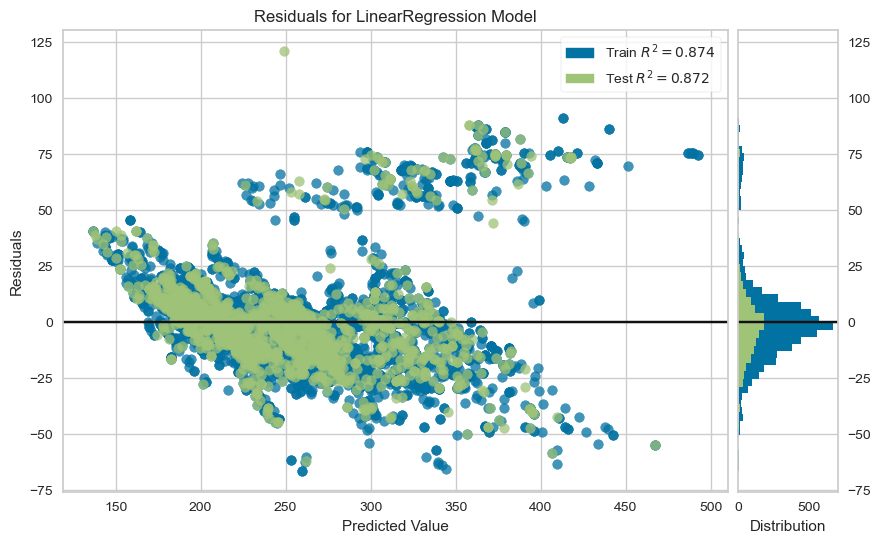

In [145]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test)  
visualizer.show(); 

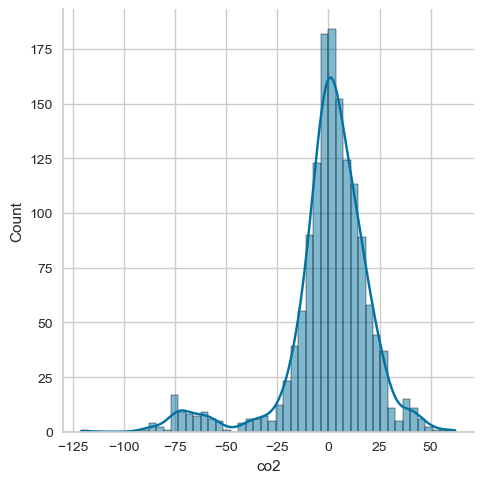

In [143]:
sns.displot((y_test-y_pred), bins=50, kde=True);

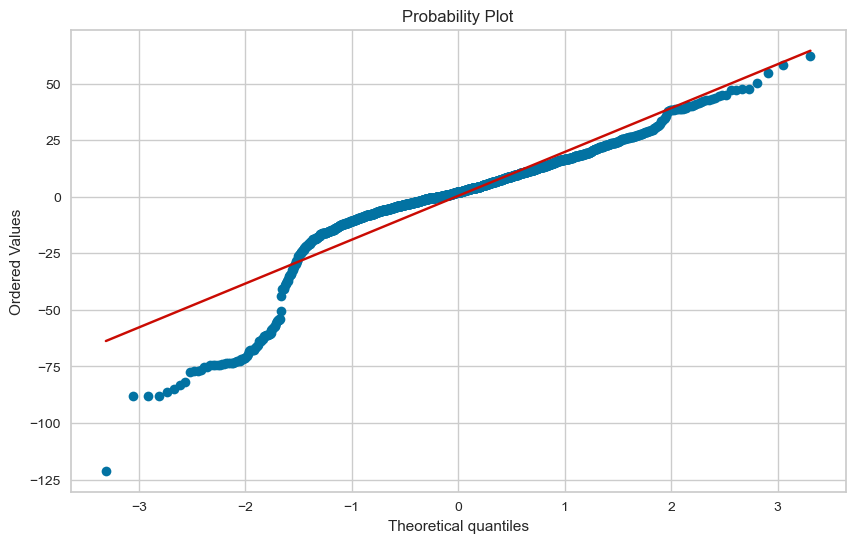

In [144]:
import scipy.stats as stats

stats.probplot(residuals, dist ="norm", plot =plt);

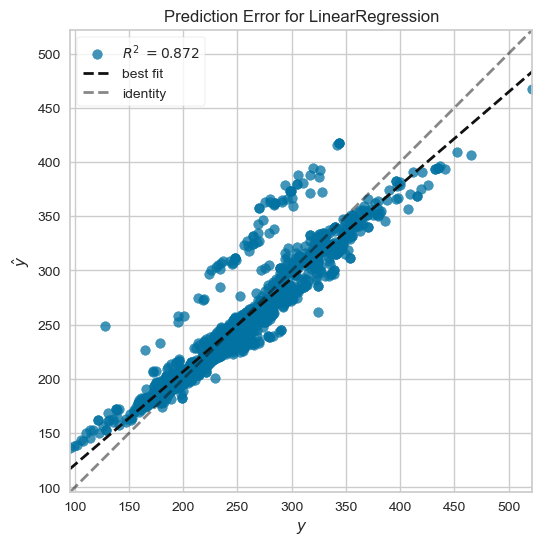

In [146]:
model = LinearRegression() # modelimizi reset ediyoruz
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # train datası ile eğitiyoruz  
visualizer.score(X_test, y_test)  # test datası ile skorlarını alıyoruz 
visualizer.show();

In [147]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [153]:
X.loc[[7369, 6396]]

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb
7369,2.000,9.600,7.100,8.500
6396,6.600,20.300,13.000,17.000


In [154]:
new_data = [[2.0, 9.6, 7.1, 8.5], [6.6, 20.3, 13, 17]]
new_data

[[2.0, 9.6, 7.1, 8.5], [6.6, 20.3, 13, 17]]

In [155]:
final_model.predict(new_data)

array([201.87285239, 378.05676483])

In [158]:
df.iloc[[7369, 6396],-1]

7369    198
6396    397
Name: co2, dtype: int64

In [159]:
print("residual: ", 198-201.87285239)
print("residual: ", 397-378.05676483)

residual:  -3.8728523899999914
residual:  18.94323516999998


## Regularization

In [161]:
df_2 = df[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb','co2']]
df_2.head()

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,co2
0,2.000,9.900,6.700,8.500,196
1,2.400,11.200,7.700,9.600,221
2,1.500,6.000,5.800,5.900,136
3,3.500,12.700,9.100,11.100,255
4,3.500,12.100,8.700,10.600,244


In [162]:
X = df_2[['engine_size', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']] 
y = df_2['co2']

In [177]:
# Polinomial conversion
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)
poly_features.shape

(7385, 34)

In [179]:
# Datatype conversion from array to dataframe
feature_names = polynomial_converter.get_feature_names_out(X.columns)
poly_df = pd.DataFrame(poly_features, columns=feature_names)
poly_df.head()

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,engine_size^2,engine_size fuel_cons_city,engine_size fuel_cons_hwy,engine_size fuel_cons_comb,fuel_cons_city^2,fuel_cons_city fuel_cons_hwy,...,fuel_cons_city^3,fuel_cons_city^2 fuel_cons_hwy,fuel_cons_city^2 fuel_cons_comb,fuel_cons_city fuel_cons_hwy^2,fuel_cons_city fuel_cons_hwy fuel_cons_comb,fuel_cons_city fuel_cons_comb^2,fuel_cons_hwy^3,fuel_cons_hwy^2 fuel_cons_comb,fuel_cons_hwy fuel_cons_comb^2,fuel_cons_comb^3
0,2.000,9.900,6.700,8.500,4.000,19.800,13.400,17.000,98.010,66.330,...,970.299,656.667,833.085,444.411,563.805,715.275,300.763,381.565,484.075,614.125
1,2.400,11.200,7.700,9.600,5.760,26.880,18.480,23.040,125.440,86.240,...,1404.928,965.888,1204.224,664.048,827.904,1032.192,456.533,569.184,709.632,884.736
2,1.500,6.000,5.800,5.900,2.250,9.000,8.700,8.850,36.000,34.800,...,216.000,208.800,212.400,201.840,205.320,208.860,195.112,198.476,201.898,205.379
3,3.500,12.700,9.100,11.100,12.250,44.450,31.850,38.850,161.290,115.570,...,2048.383,1467.739,1790.319,1051.687,1282.827,1564.767,753.571,919.191,1121.211,1367.631
4,3.500,12.100,8.700,10.600,12.250,42.350,30.450,37.100,146.410,105.270,...,1771.561,1273.767,1551.946,915.849,1115.862,1359.556,658.503,802.314,977.532,1191.016


In [180]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.9 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.9 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
poly_df.corr().style.applymap(color_correlation2)

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,engine_size^2,engine_size fuel_cons_city,engine_size fuel_cons_hwy,engine_size fuel_cons_comb,fuel_cons_city^2,fuel_cons_city fuel_cons_hwy,fuel_cons_city fuel_cons_comb,fuel_cons_hwy^2,fuel_cons_hwy fuel_cons_comb,fuel_cons_comb^2,engine_size^3,engine_size^2 fuel_cons_city,engine_size^2 fuel_cons_hwy,engine_size^2 fuel_cons_comb,engine_size fuel_cons_city^2,engine_size fuel_cons_city fuel_cons_hwy,engine_size fuel_cons_city fuel_cons_comb,engine_size fuel_cons_hwy^2,engine_size fuel_cons_hwy fuel_cons_comb,engine_size fuel_cons_comb^2,fuel_cons_city^3,fuel_cons_city^2 fuel_cons_hwy,fuel_cons_city^2 fuel_cons_comb,fuel_cons_city fuel_cons_hwy^2,fuel_cons_city fuel_cons_hwy fuel_cons_comb,fuel_cons_city fuel_cons_comb^2,fuel_cons_hwy^3,fuel_cons_hwy^2 fuel_cons_comb,fuel_cons_hwy fuel_cons_comb^2,fuel_cons_comb^3
engine_size,1.000000,0.831379,0.761526,0.817060,0.980374,0.959182,0.951365,0.958702,0.803603,0.773513,0.795303,0.719961,0.756818,0.784038,0.933075,0.938306,0.941868,0.940887,0.880217,0.874492,0.879563,0.855805,0.869245,0.877293,0.737222,0.718578,0.731740,0.689169,0.709142,0.724816,0.649506,0.675815,0.698222,0.716415
fuel_cons_city,0.831379,1.000000,0.948180,0.993810,0.799995,0.924279,0.920188,0.925004,0.980650,0.966895,0.978631,0.922622,0.954179,0.972908,0.748139,0.848525,0.854975,0.851982,0.921040,0.924435,0.923669,0.913400,0.921997,0.924530,0.926252,0.920552,0.925685,0.900709,0.914893,0.923296,0.866302,0.889613,0.907219,0.918993
fuel_cons_hwy,0.761526,0.948180,1.000000,0.977299,0.724670,0.859522,0.897695,0.875062,0.939143,0.974049,0.954340,0.983650,0.980946,0.966862,0.668823,0.777815,0.811537,0.790860,0.866488,0.900292,0.879879,0.922606,0.909861,0.892013,0.894880,0.920766,0.905614,0.934398,0.927292,0.914916,0.934201,0.935976,0.932061,0.922650
fuel_cons_comb,0.817060,0.993810,0.977299,1.000000,0.783381,0.912759,0.923309,0.918720,0.977783,0.980750,0.981807,0.954643,0.974788,0.982446,0.729492,0.834025,0.850055,0.840907,0.912966,0.926982,0.919419,0.927415,0.928743,0.924264,0.926231,0.931437,0.929635,0.922986,0.929998,0.931334,0.900050,0.916217,0.926611,0.931217
engine_size^2,0.980374,0.799995,0.724670,0.783381,1.000000,0.960953,0.945633,0.957809,0.790580,0.754593,0.780123,0.696223,0.736065,0.766793,0.984949,0.975178,0.972022,0.975421,0.899796,0.887409,0.896788,0.862024,0.879757,0.892131,0.740837,0.716613,0.733343,0.682007,0.705271,0.724432,0.637771,0.666946,0.692505,0.714083
engine_size fuel_cons_city,0.959182,0.924279,0.859522,0.912759,0.960953,1.000000,0.989617,0.998681,0.926528,0.898725,0.919368,0.844064,0.882026,0.908862,0.931453,0.980007,0.981094,0.981746,0.975675,0.969569,0.975008,0.949090,0.963809,0.972548,0.887065,0.869235,0.882089,0.838632,0.859593,0.875420,0.795587,0.824267,0.848172,0.867002
engine_size fuel_cons_hwy,0.951365,0.920188,0.897695,0.923309,0.945633,0.989617,1.000000,0.995647,0.923093,0.917419,0.923830,0.885995,0.909259,0.921531,0.909053,0.962291,0.978581,0.969417,0.964715,0.974669,0.969774,0.971070,0.975030,0.973216,0.884065,0.881860,0.884715,0.867197,0.878057,0.883783,0.839791,0.858667,0.872512,0.881191
engine_size fuel_cons_comb,0.958702,0.925004,0.875062,0.918720,0.957809,0.998681,0.995647,1.000000,0.927474,0.907452,0.923133,0.860899,0.893779,0.915550,0.925717,0.976031,0.982530,0.979710,0.974067,0.973655,0.975455,0.959125,0.970078,0.975108,0.888055,0.875729,0.885086,0.850711,0.868159,0.880459,0.813112,0.838405,0.858819,0.874112
fuel_cons_city^2,0.803603,0.980650,0.939143,0.977783,0.790580,0.926528,0.923093,0.927474,1.000000,0.987178,0.998356,0.944808,0.975211,0.993149,0.753656,0.868076,0.873658,0.871238,0.958288,0.960953,0.960700,0.949211,0.958307,0.961348,0.981151,0.974645,0.980371,0.953663,0.968654,0.977727,0.917912,0.942155,0.960615,0.973126
fuel_cons_city fuel_cons_hwy,0.773513,0.966895,0.974049,0.980750,0.754593,0.898725,0.917419,0.907452,0.987178,1.000000,0.994644,0.984835,0.997981,0.998938,0.712659,0.832825,0.853920,0.841453,0.93314

In [181]:
# Train | Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [182]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
# Ridge regularization
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)
ridge_score = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
ridge_score

,ridge_train,ridge_test
R2,0.927,0.917
mae,8.915,9.415
mse,250.513,284.606
rmse,15.828,16.870


In [187]:
# Cross Validation
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()


test_r2                                0.925
train_r2                               0.927
test_neg_mean_absolute_error          -8.948
train_neg_mean_absolute_error         -8.903
test_neg_mean_squared_error         -254.403
train_neg_mean_squared_error        -250.785
test_neg_root_mean_squared_error     -15.918
train_neg_root_mean_squared_error    -15.836
dtype: float64

In [195]:
# Coefficients
rm = Ridge(alpha=1).fit(X_train_scaled, y_train)
rm_df = pd.DataFrame(rm.coef_,  columns = ["ridge_coef_1"])
rm_df

,ridge_coef_1
0,0.824
1,67.767
2,34.535
3,77.437
4,-53.061
5,10.422
6,16.116
7,17.805
8,-45.978
9,-62.299


In [189]:
#GridSearch for Ridge
from sklearn.model_selection import GridSearchCV
alpha_space = np.linspace(0.01, 1, 100)
ridge_model = Ridge()
param_grid = {"alpha":alpha_space}
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error', 
                          cv =10, verbose =2, return_train_score=True)
grid_ridge.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .........................................alpha=0.02; total time=   0.0s
[CV] END ...................................

[CV] END .........................................alpha=0.17; total time=   0.0s
[CV] END ..........................alpha=0.18000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.18000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.18000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.18000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.18000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.18000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.18000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.18000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.18000000000000002; total time=   0.0s
[CV] END ..........................alpha=0.18000000000000002; total time=   0.0s
[CV] END .........................................alpha=0.19; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.33; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END .........................................alpha=0.34; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.51; total time=   0.0s
[CV] END .........................................alpha=0.51; total time=   0.0s
[CV] END .........................................alpha=0.51; total time=   0.0s
[CV] END .........................................alpha=0.51; total time=   0.0s
[CV] END .........................................alpha=0.51; total time=   0.0s
[CV] END .........................................alpha=0.51; total time=   0.0s
[CV] END .........................................alpha=0.51; total time=   0.0s
[CV] END .........................................alpha=0.51; total time=   0.0s
[CV] END .........................................alpha=0.51; total time=   0.0s
[CV] END .........................................alpha=0.52; total time=   0.0s
[CV] END .........................................alpha=0.52; total time=   0.0s
[CV] END .........................................alpha=0.52; total time=   0.0s
[CV] END ...................

[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END .........................................alpha=0.68; total time=   0.0s
[CV] END ...........................alpha=0.6900000000000001; total time=   0.0s
[CV] END ...........................alpha=0.6900000000000001; total time=   0.0s
[CV] END ...........................alpha=0.6900000000000001; total time=   0.0s
[CV] END ...........................alpha=0.6900000000000001; total time=   0.0s
[CV] END ...........................alpha=0.6900000000000001; total time=   0.0s
[CV] END ...................

[CV] END ..........................................alpha=0.8; total time=   0.0s
[CV] END ..........................................alpha=0.8; total time=   0.0s
[CV] END ..........................................alpha=0.8; total time=   0.0s
[CV] END ..........................................alpha=0.8; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END .........................................alpha=0.81; total time=   0.0s
[CV] END ...................

[CV] END ...........................alpha=0.9500000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END ...........................alpha=0.9600000000000001; total time=   0.0s
[CV] END .........................................alpha=0.97; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [191]:
grid_ridge.best_params_

{'alpha': 0.01}

In [192]:
pd.DataFrame(grid_ridge.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score    -15.687
mean_train_score   -15.561
Name: 0, dtype: object

In [190]:
y_pred = grid_ridge.predict(X_test_scaled)
y_train_pred = grid_ridge.predict(X_train_scaled)
g_r_score = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
g_r_score

,grid_ridge_train,grid_ridge_test
R2,0.929,0.920
mae,9.199,9.640
mse,242.309,275.638
rmse,15.566,16.602


In [193]:
# Coefficients
rgm = Ridge(alpha=0.01).fit(X_train_scaled, y_train) 
rgm_df = pd.DataFrame(rgm.coef_,  columns = ["ridge_coef_0.01"])
rgm_df

,ridge_coef_0.01
0,-10.315
1,79.968
2,49.021
3,56.465
4,-129.728
5,99.557
6,-26.906
7,124.356
8,-317.490
9,146.557


In [196]:
#Lasso Regularization
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1)
lasso_model = lasso_model.fit(X_train_scaled, y_train)
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)
ls_score = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
ls_score

,lasso_train,lasso_test
R2,0.892,0.889
mae,12.015,12.132
mse,370.290,383.515
rmse,19.243,19.584


In [197]:
# Coefficients
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])
pd.concat([rm_df, rgm_df, lsm_df], axis = 1)

,ridge_coef_1,ridge_coef_0.01,lasso_coef_1
0,0.824,-10.315,13.004
1,67.767,79.968,20.539
2,34.535,49.021,14.009
3,77.437,56.465,17.363
4,-53.061,-129.728,0.000
5,10.422,99.557,0.000
6,16.116,-26.906,0.000
7,17.805,124.356,0.000
8,-45.978,-317.490,-0.000
9,-62.299,146.557,-0.000


In [199]:
pd.concat([ridge_score, g_r_score, ls_score], axis=1)

,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test
R2,0.927,0.917,0.929,0.920,0.892,0.889
mae,8.915,9.415,9.199,9.640,12.015,12.132
mse,250.513,284.606,242.309,275.638,370.290,383.515
rmse,15.828,16.870,15.566,16.602,19.243,19.584


In [200]:
# GridSearchCV for Lasso
lasso_model = Lasso()
param_grid = {"alpha":alpha_space}
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error',
                          cv =10, verbose =2, return_train_score=True)
grid_lasso.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END .........................................alpha=0.01; total time=   0.2s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.5s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.5s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END .........................................alpha=0.01; total time=   0.4s
[CV] END .........................................alpha=0.01; total time=   0.3s
[CV] END .........................................alpha=0.02; total time=   0.4s
[CV] END ...................................

[CV] END .........................................alpha=0.11; total time=   0.3s
[CV] END .........................................alpha=0.11; total time=   0.3s
[CV] END .........................................alpha=0.11; total time=   0.3s
[CV] END .........................................alpha=0.11; total time=   0.3s
[CV] END .........................................alpha=0.11; total time=   0.3s
[CV] END .........................................alpha=0.11; total time=   0.3s
[CV] END .........................................alpha=0.11; total time=   0.3s
[CV] END .........................................alpha=0.11; total time=   0.3s
[CV] END .........................................alpha=0.11; total time=   0.3s
[CV] END .........................................alpha=0.12; total time=   0.3s
[CV] END .........................................alpha=0.12; total time=   0.3s
[CV] END .........................................alpha=0.12; total time=   0.3s
[CV] END ...................

[CV] END ..........................alpha=0.21000000000000002; total time=   0.3s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.3s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.3s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.3s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.3s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.3s
[CV] END ..........................alpha=0.21000000000000002; total time=   0.3s
[CV] END .........................................alpha=0.22; total time=   0.3s
[CV] END .........................................alpha=0.22; total time=   0.3s
[CV] END .........................................alpha=0.22; total time=   0.3s
[CV] END .........................................alpha=0.22; total time=   0.3s
[CV] END .........................................alpha=0.22; total time=   0.3s
[CV] END ...................

[CV] END .........................................alpha=0.31; total time=   0.3s
[CV] END .........................................alpha=0.31; total time=   0.3s
[CV] END .........................................alpha=0.31; total time=   0.3s
[CV] END .........................................alpha=0.31; total time=   0.3s
[CV] END .........................................alpha=0.31; total time=   0.3s
[CV] END .........................................alpha=0.32; total time=   0.3s
[CV] END .........................................alpha=0.32; total time=   0.3s
[CV] END .........................................alpha=0.32; total time=   0.4s
[CV] END .........................................alpha=0.32; total time=   0.4s
[CV] END .........................................alpha=0.32; total time=   0.3s
[CV] END .........................................alpha=0.32; total time=   0.3s
[CV] END .........................................alpha=0.32; total time=   0.3s
[CV] END ...................

[CV] END ..........................alpha=0.41000000000000003; total time=   0.3s
[CV] END ..........................alpha=0.41000000000000003; total time=   0.3s
[CV] END ..........................alpha=0.41000000000000003; total time=   0.3s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.2s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.3s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.3s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.3s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.3s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.3s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.3s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.3s
[CV] END ..........................alpha=0.42000000000000004; total time=   0.5s
[CV] END ...................

[CV] END .........................................alpha=0.51; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.52; total time=   0.3s
[CV] END .........................................alpha=0.53; total time=   0.3s
[CV] END ...................

[CV] END .........................................alpha=0.62; total time=   0.3s
[CV] END .........................................alpha=0.62; total time=   0.3s
[CV] END .........................................alpha=0.62; total time=   0.3s
[CV] END .........................................alpha=0.62; total time=   0.3s
[CV] END .........................................alpha=0.62; total time=   0.3s
[CV] END .........................................alpha=0.62; total time=   0.3s
[CV] END .........................................alpha=0.62; total time=   0.3s
[CV] END .........................................alpha=0.62; total time=   0.3s
[CV] END .........................................alpha=0.62; total time=   0.4s
[CV] END .........................................alpha=0.63; total time=   0.3s
[CV] END .........................................alpha=0.63; total time=   0.3s
[CV] END .........................................alpha=0.63; total time=   0.3s
[CV] END ...................

[CV] END .........................................alpha=0.72; total time=   0.3s
[CV] END .........................................alpha=0.72; total time=   0.3s
[CV] END .........................................alpha=0.72; total time=   0.3s
[CV] END .........................................alpha=0.72; total time=   0.3s
[CV] END .........................................alpha=0.72; total time=   0.3s
[CV] END .........................................alpha=0.72; total time=   0.2s
[CV] END .........................................alpha=0.72; total time=   0.3s
[CV] END .........................................alpha=0.73; total time=   0.3s
[CV] END .........................................alpha=0.73; total time=   0.3s
[CV] END .........................................alpha=0.73; total time=   0.3s
[CV] END .........................................alpha=0.73; total time=   0.3s
[CV] END .........................................alpha=0.73; total time=   0.3s
[CV] END ...................

[CV] END ...........................alpha=0.8200000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8200000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.4s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...........................alpha=0.8300000000000001; total time=   0.3s
[CV] END ...................

[CV] END .........................................alpha=0.92; total time=   0.3s
[CV] END .........................................alpha=0.92; total time=   0.3s
[CV] END .........................................alpha=0.92; total time=   0.3s
[CV] END .........................................alpha=0.93; total time=   0.3s
[CV] END .........................................alpha=0.93; total time=   0.3s
[CV] END .........................................alpha=0.93; total time=   0.3s
[CV] END .........................................alpha=0.93; total time=   0.3s
[CV] END .........................................alpha=0.93; total time=   0.3s
[CV] END .........................................alpha=0.93; total time=   0.3s
[CV] END .........................................alpha=0.93; total time=   0.3s
[CV] END .........................................alpha=0.93; total time=   0.4s
[CV] END .........................................alpha=0.93; total time=   0.3s
[CV] END ...................

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [201]:
grid_lasso.best_params_

{'alpha': 0.01}

In [202]:
grid_lasso.best_index_

0

In [203]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score    -16.565
mean_train_score   -16.470
Name: 0, dtype: object

In [204]:
# Comparison of coefficients of different models
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train)
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.01"])
pd.concat([rm_df, rgm_df, lsm_df, lgm_df], axis = 1)

,ridge_coef_1,ridge_coef_0.01,lasso_coef_1,lasso_coef_0.01
0,0.824,-10.315,13.004,39.911
1,67.767,79.968,20.539,78.082
2,34.535,49.021,14.009,19.491
3,77.437,56.465,17.363,5.805
4,-53.061,-129.728,0.000,-106.904
5,10.422,99.557,0.000,-0.065
6,16.116,-26.906,0.000,8.701
7,17.805,124.356,0.000,0.863
8,-45.978,-317.490,-0.000,-68.608
9,-62.299,146.557,-0.000,-6.695


In [205]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)
lg_score = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lg_score

,grid_lasso_train,grid_lasso_test
R2,0.921,0.914
mae,8.990,9.306
mse,271.461,296.376
rmse,16.476,17.216


In [207]:
# According to comparison of error metrics of different models grid_lasso model has the best error metrics.
pd.concat([ridge_score, g_r_score, ls_score, lg_score], axis=1)

,ridge_train,ridge_test,grid_ridge_train,grid_ridge_test,lasso_train,lasso_test,grid_lasso_train,grid_lasso_test
R2,0.927,0.917,0.929,0.920,0.892,0.889,0.921,0.914
mae,8.915,9.415,9.199,9.640,12.015,12.132,8.990,9.306
mse,250.513,284.606,242.309,275.638,370.290,383.515,271.461,296.376
rmse,15.828,16.870,15.566,16.602,19.243,19.584,16.476,17.216


In [208]:
# Final Model
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)
final_model = Lasso(alpha=0.01)
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

In [217]:
# Producing new data
mean = df_2.mean()
std = df_2.std()

# Producing random samples from normal distribution
size = 10 # Number of rows
new_df = pd.DataFrame(np.random.normal(mean, std, size=(size, 5)), columns=df_2.columns)
new_df

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,co2
0,4.775,7.259,10.521,12.688,271.160
1,3.737,14.683,7.967,11.967,188.726
2,4.769,15.501,9.239,11.281,253.281
3,5.642,13.847,7.987,9.039,107.416
4,1.180,12.413,11.378,11.524,300.331
5,3.215,16.338,6.372,6.196,262.607
6,1.290,5.856,9.128,15.943,212.904
7,3.124,13.319,11.771,8.871,222.970
8,2.069,14.171,11.283,7.888,326.817
9,0.744,14.841,7.330,10.451,277.513


In [227]:
new_X = new_df.iloc[:3,:4]
new_X

,engine_size,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb
0,4.775,7.259,10.521,12.688
1,3.737,14.683,7.967,11.967
2,4.769,15.501,9.239,11.281


In [228]:
poly_sample = polynomial_converter.transform(new_X)
poly_sample

array([[   4.7754883 ,    7.25850954,   10.52109377,   12.68772413,
          22.80528852,   34.66292738,   50.24336022,   60.59007815,
          52.68596068,   76.36745946,   92.09396657,  110.69341413,
         133.48873529,  160.97834356,  108.90638855,  165.53240419,
         239.93657899,  289.34720943,  251.6011889 ,  364.69190928,
         439.79366004,  528.61510425,  637.47389381,  768.75019654,
         382.42154799,  554.31393269,  668.46493455,  803.46920197,
         968.92925801, 1168.4628418 , 1164.61578979, 1404.44750129,
        1693.66824765, 2042.44881383],
       [   3.73662151,   14.68299626,    7.96732041,   11.9669676 ,
          13.96234028,   54.8647996 ,   29.77086078,   44.7160285 ,
         215.59037911,  116.9841357 ,  175.71094048,   63.47819445,
          95.34466515,  143.20831353,   52.17198099,  205.00899015,
         111.24243866,  167.0868738 ,  805.57964723,  437.12543742,
         656.56527918,  237.19398659,  356.26692636,  535.11526427,
        3

In [229]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

array([[ 1.19300342, -1.5137051 ,  0.66510083,  0.59214011,  1.07258144,
        -0.29638317,  0.96604515,  0.88743523, -1.17542313, -0.66582927,
        -0.65837037,  0.5180072 ,  0.48685702,  0.44527881,  0.87583548,
        -0.05795972,  0.87849668,  0.80645685, -0.60481398, -0.20023056,
        -0.21431327,  0.7004473 ,  0.65500712,  0.60335355, -0.87796238,
        -0.73397867, -0.72541109, -0.38622768, -0.39240319, -0.39793049,
         0.35010105,  0.33282098,  0.30993846,  0.2821691 ],
       [ 0.42579045,  0.60755435, -0.48302071,  0.34294261,  0.20920859,
         0.37210698, -0.05459913,  0.26707723,  0.4579494 , -0.05874188,
         0.32864055, -0.50134794, -0.17714071,  0.19924504,  0.01850597,
         0.13998764, -0.09146894,  0.08370511,  0.2458504 , -0.03444031,
         0.17701586, -0.27398121, -0.09633598,  0.1087397 ,  0.28921648,
        -0.0166486 ,  0.21248442, -0.27199896, -0.0837091 ,  0.13700494,
        -0.47561239, -0.32746684, -0.14855625,  0.06314227],
  

In [237]:
pred = final_model.predict(scaled_sample)
pred_y = pd.DataFrame(pred, columns = ["prediction"])
pred_y

,prediction
0,196.934
1,268.758
2,290.524


In [233]:
new_y = new_df.iloc[:3,4:]
new_y

,co2
0,271.160
1,188.726
2,253.281


In [239]:
result = pd.concat([pred_y, new_y], axis = 1)
result

,prediction,co2
0,196.934,271.160
1,268.758,188.726
2,290.524,253.281


In [240]:
result["differences"]=result["prediction"]-result["co2"]
result

,prediction,co2,differences
0,196.934,271.160,-74.226
1,268.758,188.726,80.032
2,290.524,253.281,37.243


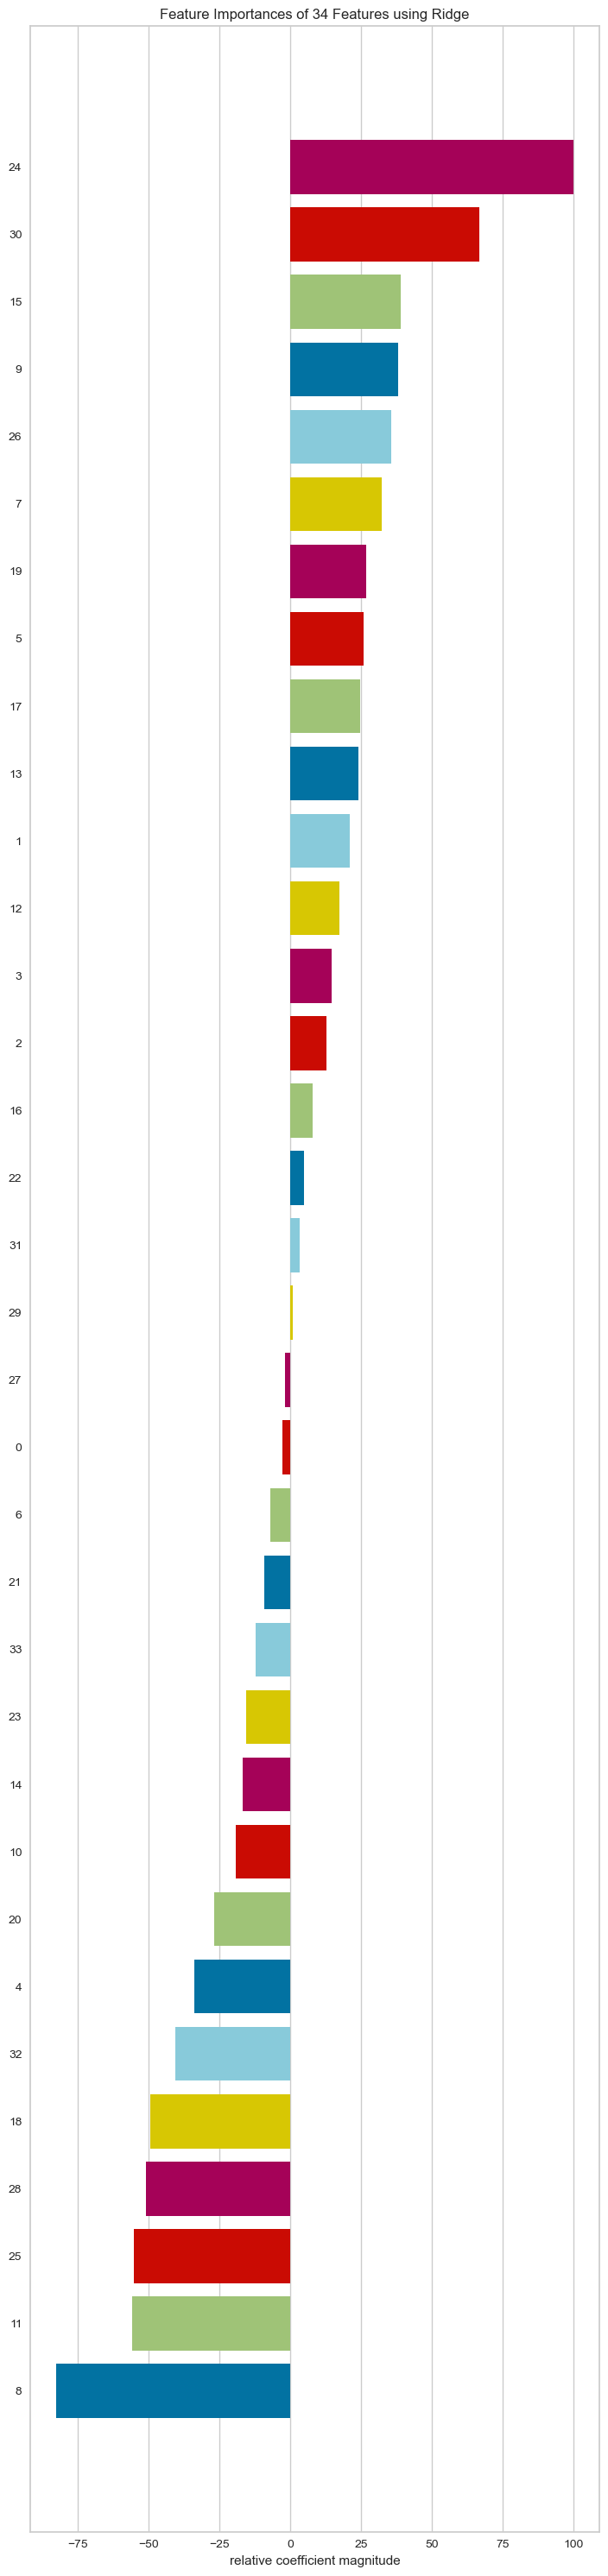

In [241]:
# Feature importance with ridge
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

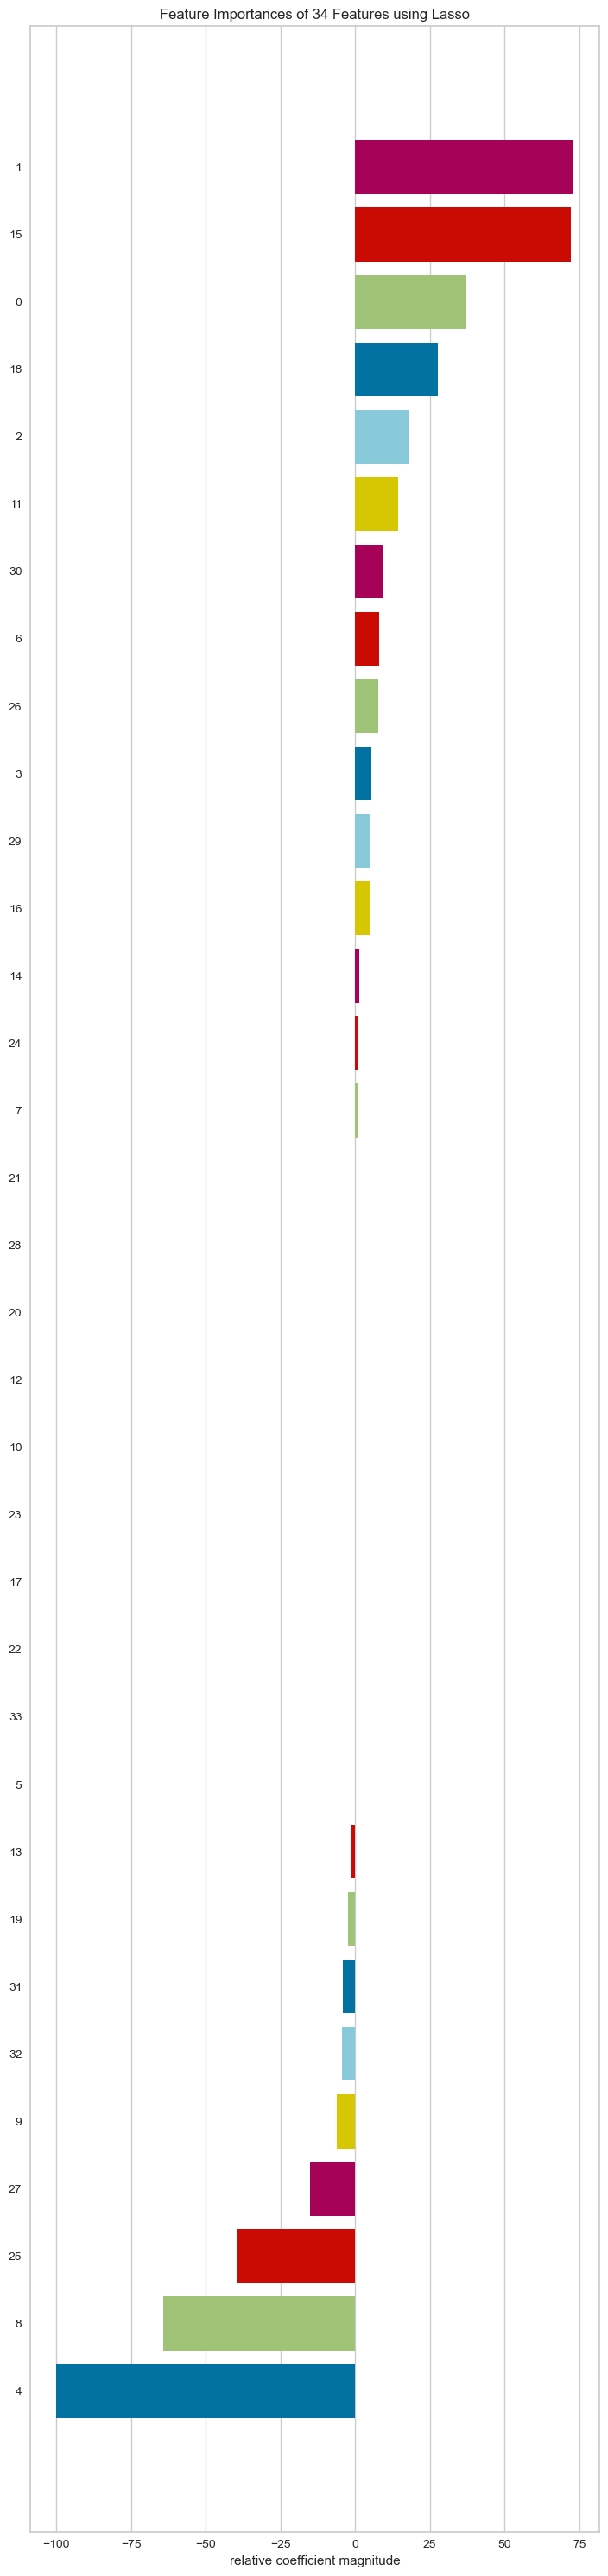

In [242]:
# Feature importance with lasso (alpha=0.01)
model = Lasso(alpha=0.01)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

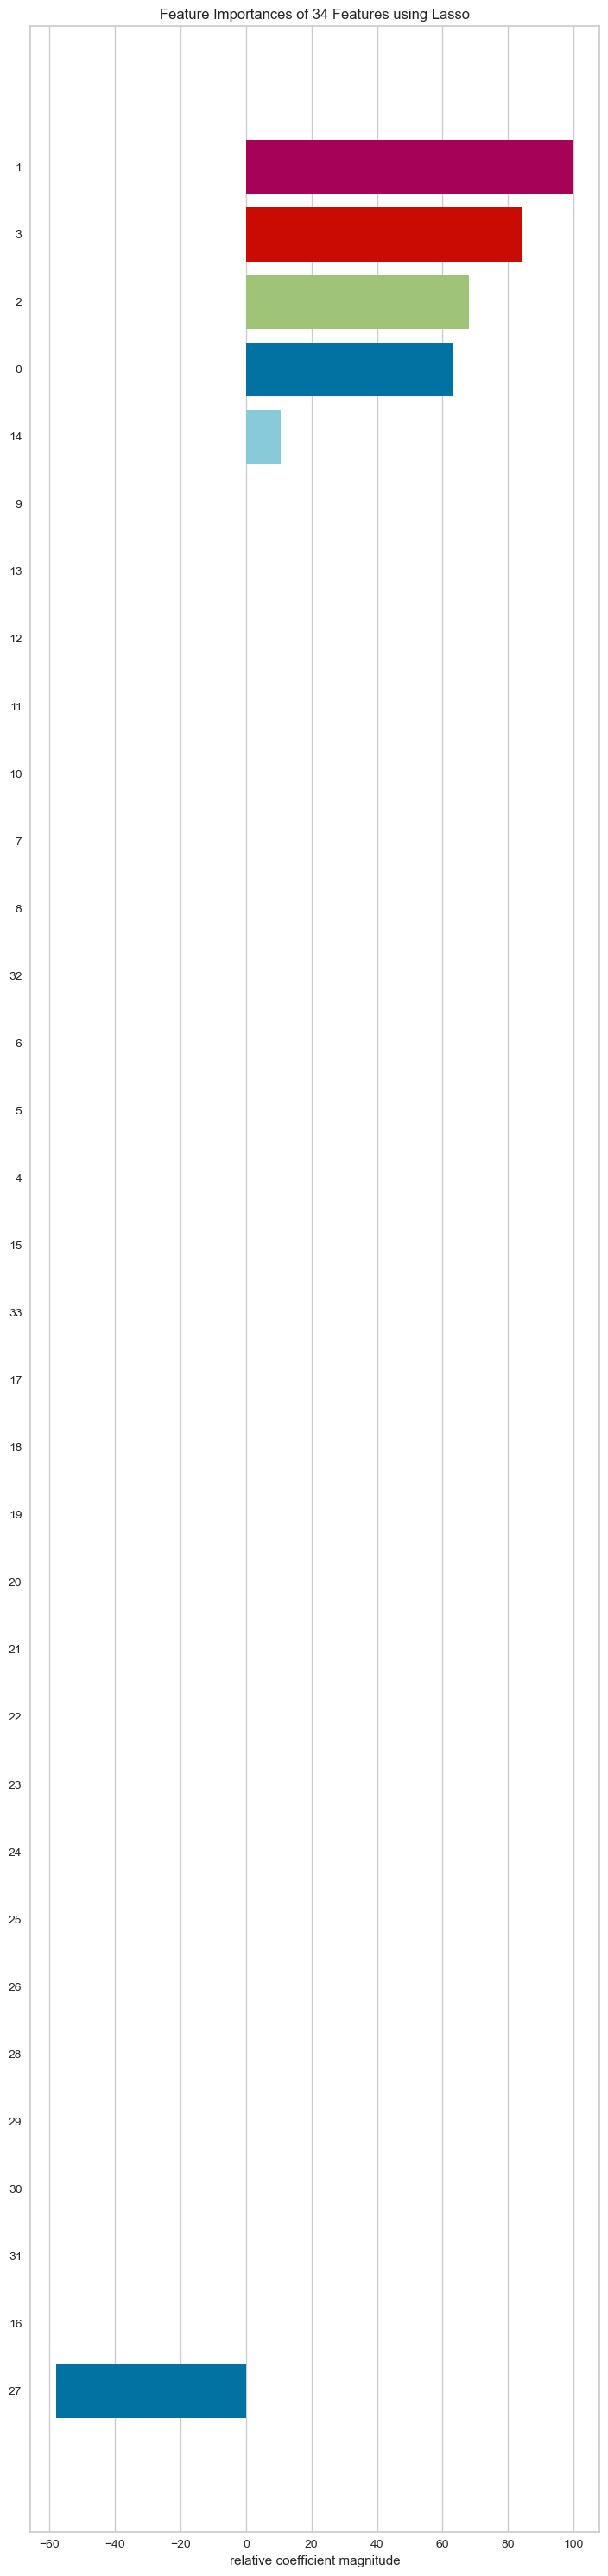

In [243]:
# Feature importance with lasso (alpha=0.01)
model = Lasso(alpha=1)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();